In [ ]:
%pip install category_encoders
%pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=a9b9aeb48469b3317256aee9258ac2b75dedfbf5ed36769cd3de88cf2f962ea1
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=1ec955129894268887e3358c9012930c64f5249f9af4561a2ce1e3cbdf258593
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/5

In [ ]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding
from skimage import io               # for input/output processing

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
plt.style.use('seaborn')

<ipython-input-3-efaf7e4e7bd4>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

file_path = "/content/drive/MyDrive/Neuroimaging/NeuroSLE/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


,Patient,Date of Birth,Gender,Education,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,Paziente 1,30084,0,High School,109.5,38.00,0,0.0,1,1,...,2.2623,0.021072,18.2292,2.4475,0.022797,2.2930,0.021358,2.5970,0.024190,-12.4336
1,Paziente 2,26505,0,University,96.0,41.17,13,2.1,0,1,...,1.8574,0.017152,-18.2462,1.3628,0.012585,1.2929,0.011940,1.4317,0.013222,-10.1909
2,Paziente 3,31954,0,University,76.5,32.00,2,0.5,0,1,...,2.6216,0.024634,6.8561,2.3106,0.021711,2.4840,0.023341,2.1159,0.019882,16.0040
3,Paziente 4,32438,0,University,79.1,31.00,2,0.0,1,1,...,3.0341,0.028616,-6.5858,2.1641,0.020410,2.2997,0.021689,2.0193,0.019045,12.9849
4,Paziente 5,28445,0,high school,42.0,43.00,2,0.4,0,1,...,3.9152,0.035652,-10.4521,2.5960,0.023640,2.5593,0.023305,2.6209,0.023866,-2.3788


In [ ]:
db['SLEDAI2K'] = pd.cut(db['SLEDAI-2k (at the time of NP event)'], bins=[-1,4,15, float('Inf')], labels=[1, 2, 3])
db['PGA'] = pd.cut(db['PGA (at the time of fMRI)'], bins=[0,1,2, float('Inf')], labels=[1, 2, 3])
db['SLICCDI'] = pd.cut(db['SLICC-DI (at the time of NP event)'], bins=[-1,0, float('Inf')], labels=[1, 2])

In [ ]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Gender', 'Education', 'Age', 'SLEDAI-2k (at the time of NP event)', 'SLICC-DI (at the time of NP event)', 'PGA (at the time of fMRI)'], axis = 'columns')
# drop columns that include "%" in their name
cols_to_drop = [col for col in df.columns if "%" in col]
df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 729 


In [ ]:
df.head()

,Disease duration (months),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro/SSA,Anti-La/SSB,Anti-RNP,anti-Sm,C3 (mg/dl),C4 (mg/dl),aPL syndrome,...,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry,SLEDAI2K,PGA,SLICCDI
0,109.5,1,3.0,0,0,0,0,89,20,0,...,2.4475,0.022797,2.2930,0.021358,2.5970,0.024190,-12.4336,1,NaN,2
1,96.0,1,84.4,1,0,0,0,64,15,0,...,1.3628,0.012585,1.2929,0.011940,1.4317,0.013222,-10.1909,2,3,1
2,76.5,1,4.0,1,0,0,0,97,17,0,...,2.3106,0.021711,2.4840,0.023341,2.1159,0.019882,16.0040,1,1,1
3,79.1,1,5.0,0,0,0,0,84,14,0,...,2.1641,0.020410,2.2997,0.021689,2.0193,0.019045,12.9849,1,NaN,2
4,42.0,1,37.2,1,0,0,0,101,11,0,...,2.5960,0.023640,2.5593,0.023305,2.6209,0.023866,-2.3788,1,1,1


In [ ]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['PGA','SLICCDI', 'Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disease duration (months),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro/SSA,Anti-La/SSB,Anti-RNP,anti-Sm,C3 (mg/dl),C4 (mg/dl),aPL syndrome,...,Biologic_none,Biologic_tocilizumab,Event_CVA,Event_Mood abnormalities (depressive),Event_Mood abnormalities (mixed),Event_Movement Disorder,Event_Psychosis,Event_Seizure,"Event_Seizure, ACS, myelitis, CVA",Event_nan
0,109.5,1,3.0,0,0,0,0,89,20,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96.0,1,84.4,1,0,0,0,64,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,76.5,1,4.0,1,0,0,0,97,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,79.1,1,5.0,0,0,0,0,84,14,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42.0,1,37.2,1,0,0,0,101,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df = df.dropna(axis=1)

In [ ]:
df['SLEDAI2K'].shape

(27,)

In [ ]:
# 0 = No Event
df.loc[df['NP-SLE']== 0, 'result'] = 0

# 1 = NP Event
df.loc[df['NP-SLE'] ==1, 'result'] = 1

y = df.pop("result")
df.drop(['NP-SLE'], axis = 'columns')
X_scaled = StandardScaler().fit_transform(df)

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(X=X_scaled)
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(27, 27)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-4.02,-0.97,-5.55,-0.52,3.09,-1.00,-0.48,11.02,-5.66,-3.07,...,-3.18,-0.35,-1.30,-2.12,-2.43,1.62,-0.56,3.15,2.45,0.0
1,18.93,6.66,10.75,14.74,-6.22,0.39,-8.88,4.87,-2.14,4.15,...,0.09,-1.05,4.76,-2.28,-0.58,-1.59,-0.93,0.41,0.93,0.0
2,-5.86,-4.06,-1.61,1.25,3.15,-9.84,1.52,-3.23,-4.09,-1.97,...,-1.59,-1.31,0.67,-0.01,-1.42,3.91,-5.87,-3.85,6.08,0.0
3,-3.32,-9.06,-1.60,-1.71,-1.53,2.26,-4.00,4.41,0.82,1.29,...,5.76,1.79,-1.13,5.57,0.43,3.56,-4.70,1.64,-3.47,0.0
4,-28.18,13.90,21.53,1.79,0.82,7.71,3.93,5.03,3.69,-3.34,...,-2.58,-1.38,-1.31,2.45,0.09,1.55,1.38,-2.80,1.20,0.0


In [ ]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,754
0,0.008852,-0.002560,-0.001706,-0.002622,-0.006763,0.008230,-0.003777,-0.005810,0.003832,0.042685,...,-0.006954,-0.002560,0.018308,-0.008075,-0.010685,-0.016584,0.005822,0.009613,0.033875,-0.012237
1,0.001412,0.012767,0.028636,-0.019316,-0.006297,-0.023968,-0.023359,-0.002151,0.027149,0.014932,...,0.006031,-0.014957,0.010316,-0.019640,-0.039159,-0.016589,0.000943,0.024717,0.000234,0.016311
2,-0.003571,-0.007167,-0.006132,0.034388,-0.021156,0.011021,-0.015334,0.036468,0.004448,-0.007751,...,-0.018833,-0.006082,0.032691,-0.040734,0.015610,0.033776,-0.055628,0.001328,-0.019024,0.036158
3,0.015913,0.048332,-0.016178,0.000349,-0.017911,-0.008840,-0.046459,-0.042119,-0.054918,-0.030716,...,0.006346,-0.010810,-0.027829,-0.040167,-0.014053,-0.019050,0.073021,-0.085145,-0.024086,0.078641
4,-0.022585,0.010371,-0.013401,-0.002652,-0.017842,-0.050510,-0.063666,0.068864,0.049579,0.072958,...,-0.052432,-0.011736,0.052671,-0.027881,0.031564,0.049618,0.094482,0.004368,-0.014358,-0.075759


In [ ]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.34 0.16 0.07 0.04 0.03 0.03 0.03 0.03 0.02 0.02]


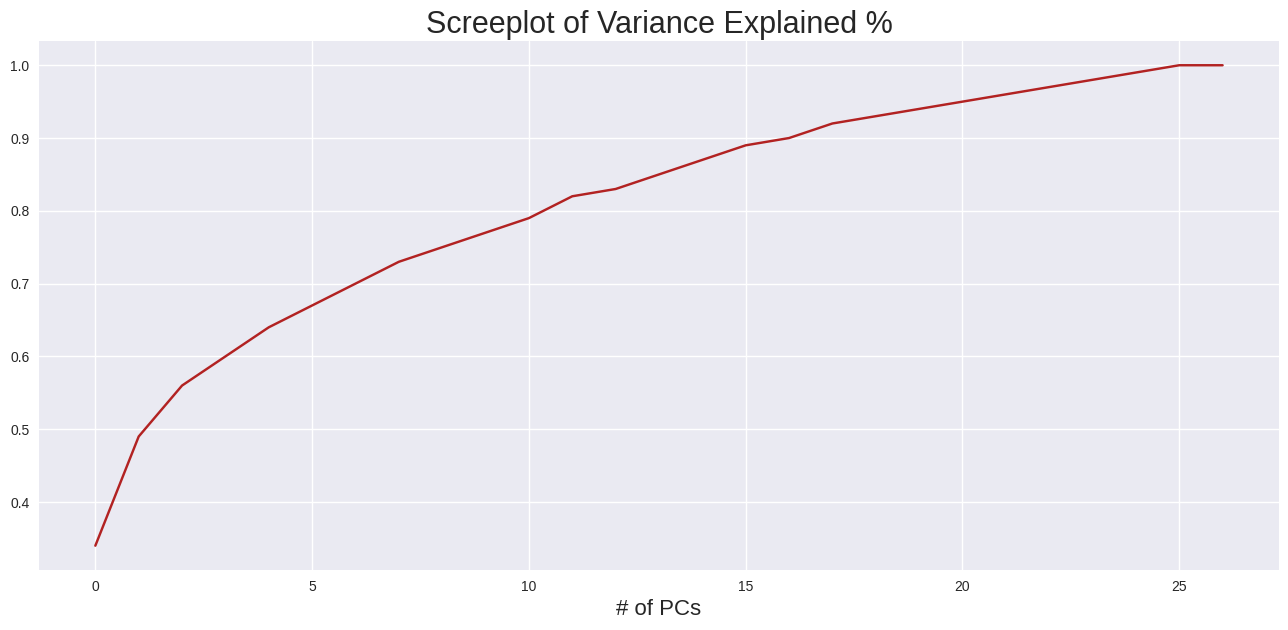

In [ ]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [ ]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)


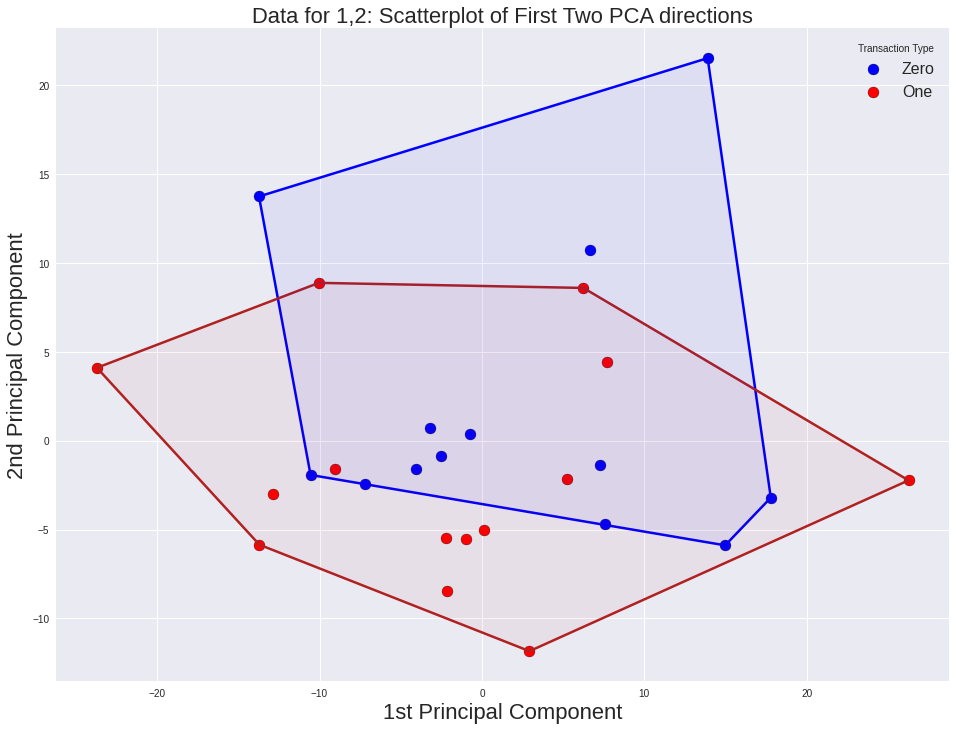

In [ ]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = y==0;
rows_1 = y==1;
#rows_2 = y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
#ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("Data for 1,2: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

In [ ]:
# Combine dimension reduction and tSNE. 
# Allow user to adjust the number of principal components and the perplexity of tSNE.
# Plot interactively.
## Define corresponding func for each of the dimension reduction approaches.
def PCAsm(data, n, max_it):
    name = "PCA"
    pcaer = PCA(n_components=n)
    pcad = pcaer.fit_transform(data)
    df = pd.DataFrame(pcad, index=data.index)
    print("Shape of dimension reduced matrix is:", pcad.shape)
    return df,name

def FastICAsm(data, n, max_it):
    name = "ICA"
    icaer = FastICA(n_components=n, max_iter=max_it)
    icad = icaer.fit_transform(data)
    print("Shape of dimension reduced matrix is:", icad.shape)
    df = pd.DataFrame(icad, index=data.index)
    return df,name

## Define the main func to take in all adjustable variables
## Smush, save the new dataframe in df, and plot the tSNE plot.
def f(data, sm, n = 10,perp = 30, max_it = 600, it = 1000):
    """
    Reduce the dimension of original dataset via PCA, ICA or NMF as chosen by user.
    The output dataframe will be used as input of tSNE.
    Upon activation by interact(), user can choose their desired sm, n, perp, max_it, and it. 
    In current version, tSNE is using 'Manhattan' as the distance matrix and working at learning rate of 1000.
    
    Args:
        sm: str. Name of smusher. Choose from PCA, ICA and NMF
        n: int. Initial number of dimensions. The number of dimensions of smusher processed matrix before tSNE
        perp: int. Perplexity level of tSNE
        max_it: int. Maximum number of iterations in ICA or NMF
        it: int. Maximum number of iterations in tSNE
    """
    df, name = sm(data, n, max_it)
    print("Perplexity level:", perp)
    tsner = TSNE(perplexity=perp,n_iter=it,metric='manhattan')
    tsned = tsner.fit_transform(df)
    plt.figure(figsize=(3,3))
    plt.scatter(tsned[:,0],tsned[:,1], 10, c=y)
    plt.xlabel("tSNE1",fontsize=16)
    plt.ylabel("tSNE2",fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    title = name + ":" + str(n) + " initial dimensions, " + "perplexity level at " + str(perp) + ", " + str(it) + " iterations"
    plt.title(title)

Shape of dimension reduced matrix is: (27, 11)
Perplexity level: 10


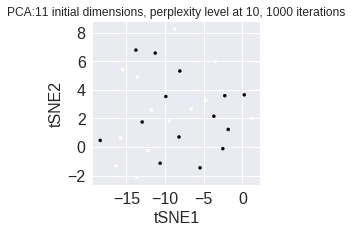

In [ ]:
f(data=df, sm=PCAsm, n = 11,perp = 10, max_it = 600, it = 1000)

In [ ]:
from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_scaled)
proj_3d = umap_3d.fit_transform(X_scaled)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y, labels={'color': 'result'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=y, labels={'color': 'result'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

## Correlation analysis

## Regression analysis

In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');
view raw

In [ ]:
# Visually determine optimal number of principal components
best_pc_num = 9

# Train model with first 9 principal components
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get cross-validation RMSE (train set)
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv, 
                                       scoring='neg_root_mean_squared_error').mean()

# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

# Get first 9 principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)

## ANOVA

## Cluster analysis

## Classification analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    KFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
np.random.seed(3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
def make_pcc(X_train, X_test, y_train, y_test):
    number_of_feature_columns = X_train.shape[1]
    accuracy_history = []
    components = [i+1 for i in range(25)]
    
    for i in range(1, 26):
        pca = PCA(n_components=i)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        clf = RandomForestClassifier()
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        accuracy_history.append(metrics.accuracy_score(y_test, y_pred))
    assert len(accuracy_history) == len(components)
    figure(figsize=(10,7))
    plt.bar(components , accuracy_history)
    plt.xlabel('PCs')
    plt.ylabel('Accuracy')
    plt.show()
    
make_pcc(X_train, X_test, y_train, y_test)